## Assignment

### Part I

#### Clean your data

+ Read in temp_data.txt
    + It won't be easy! You'll need to find a way to clean the data
    + Try opening the file in a text editor first
+ Read in temp_X.csv
+ Merge the X variable from temp_X with the data from temp_data
+ Note that we discussed this in class, but it's something you'll just need to practice on your own. 
+ You will struggle with this and it's ok
+ Check out the documentation for read_csv() in the pandas package


### Part II

#### Run a linear regression
+ Using X to predict temperature 
+ Interpret your coefficients!
+ What is one potential use for this linear regression equation? 
+ What does this linear regression mean? 
+ Is this a good model? Why or why not? 

    


In [217]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model
from sklearn import metrics, cross_validation, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso



In [159]:
column_names= ['Station ID', 'Series Number', 'Date','Temperature (C)', 'Uncertainty (C)', 'Observations', 'Time of Observation']

In [185]:
df = pd.read_csv('/Users/Carter/Projects/DataScience/DS-SF-32/lessons/lesson-6/clean_data.csv', sep="\t", names=column_names)
df = df.rename(columns={'Station ID': 'Station_ID', 'Series Number': 'Series_Number', 'Temperature (C)': 'Temperature'})
df = df.drop(df.index[0])
df = df.reset_index()
df.head()



,index,Station_ID,Series_Number,Date,Temperature,Uncertainty (C),Observations,Time of Observation
0,1,25398,1.0,1986.708,26.611,0.0507,30.0,24.0
1,2,25398,1.0,1986.875,27.593,0.0507,30.0,24.0
2,3,25398,1.0,1986.958,28.226,0.0499,31.0,24.0
3,4,25398,1.0,1987.042,27.581,0.0499,31.0,24.0
4,5,25398,1.0,1987.125,27.996,0.0525,28.0,24.0


In [186]:
# read in the mammal dataset

df_1 = pd.read_csv('/Users/Carter/Projects/DataScience/DS-SF-32/lessons/lesson-6/temp_X.csv')

df_1.head()





,Unnamed: 0,Station_ID,Series_Number,Date,X
0,0,25398,1,1986.708,79.8998
1,1,25398,1,1986.875,81.6674
2,2,25398,1,1986.958,82.8068
3,3,25398,1,1987.042,81.6458
4,4,25398,1,1987.125,82.3928


In [227]:
df_1_modified = df_1[['Station_ID','Series_Number','Date', 'X']]

df_1_modified.head()


,Station_ID,Series_Number,Date,X
0,25398,1,1986.708,79.8998
1,25398,1,1986.875,81.6674
2,25398,1,1986.958,82.8068
3,25398,1,1987.042,81.6458
4,25398,1,1987.125,82.3928


In [230]:
big_df = pd.merge(df, df_1_modified, how='inner', on=['Station_ID', 'Series_Number', 'Date'])
big_df.shape
# still getting messed up figures here, the merge is creating Cartesian issue

(10566, 9)

In [231]:
print df_1_modified.shape


(141637, 4)


In [189]:
results = pd.concat([df, df_1_modified[['X']]], axis=1)
results.head()

,index,Station_ID,Series_Number,Date,Temperature,Uncertainty (C),Observations,Time of Observation,X
0,1,25398,1.0,1986.708,26.611,0.0507,30.0,24.0,79.8998
1,2,25398,1.0,1986.875,27.593,0.0507,30.0,24.0,81.6674
2,3,25398,1.0,1986.958,28.226,0.0499,31.0,24.0,82.8068
3,4,25398,1.0,1987.042,27.581,0.0499,31.0,24.0,81.6458
4,5,25398,1.0,1987.125,27.996,0.0525,28.0,24.0,82.3928


In [190]:
results.isnull().sum()

index                  0
Station_ID             0
Series_Number          0
Date                   0
Temperature            0
Uncertainty (C)        0
Observations           0
Time of Observation    0
X                      0
dtype: int64

In [191]:
results[['Temperature', 'X']].corr()

,Temperature,X
Temperature,1.0,1.0
X,1.0,1.0


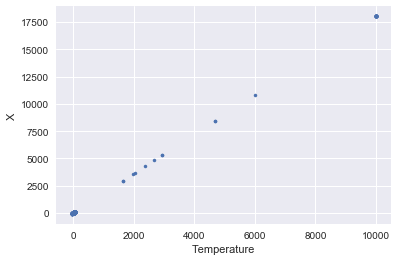

In [192]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(results['Temperature'], results['X'], '.')
plt.xlabel('Temperature')
plt.ylabel('X')
# show the plot
plt.show()

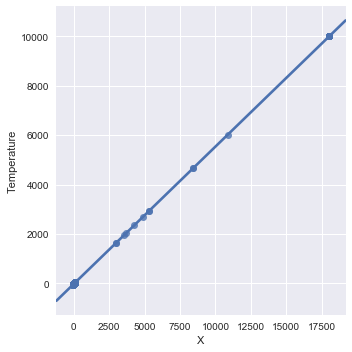

In [225]:
sns.lmplot('X', 'Temperature', results)
# fit regression models across conditional subsets of a dataset.

In [196]:
#this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

temp = 'Temperature'

In [199]:
lm = smf.ols(formula= 'Temperature ~ X', data=results).fit()

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'

#print the full summary
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.295e+34
Date:                Tue, 07 Mar 2017   Prob (F-statistic):               0.00
Time:                        09:37:32   Log-Likelihood:             3.8179e+06
No. Observations:              141637   AIC:                        -7.636e+06
Df Residuals:                  141635   BIC:                        -7.636e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -17.7778    1.3e-15  -1.37e+16      0.0

Coefficient interpretation: a unit increase in 'X' leads to a ~0.56 increase in temperature
Y intercept is -17.78.  If the temperature is 0 degrees celcius, there will be -17 units of 'X'

In [203]:
#Prediction based upon a certain 'X' value
X_new = pd.DataFrame({'X': [50]})
lm.predict(X_new)

array([ 10.])

In [213]:
y = results['Temperature']
x = results[['X']]

#calculating mean squared error with regurlar OLS model
metrics.mean_squared_error(y, lm.predict(x))

2.2615148450441571e-25

In [223]:
# running regression to protect against regularization, using Lasso as an example
lm_lasso = linear_model.Lasso().fit(results, y)
print metrics.mean_squared_error(y, lm_lasso.predict(results))

1.52018565547e-05


In [222]:
lm= linear_model.LinearRegression().fit(x,y)


TypeError: fit() takes at least 3 arguments (1 given)

In [ ]:
#Attempting KFold cross validation
kf = cross_validation.KFold(len(results), n_folds=5, shuffle=True)
scores = []

